In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss

In [211]:
df = pd.read_csv('Train.csv')
df.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0


In [212]:
#lets check if our data have any null values
#print(df.isna().sum())
df.dtypes

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [213]:
df = df.fillna(-99999)
# df = df.dropna()
df1 = pd.DataFrame.copy(df)
df.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,-99999.0,97.0,355.0,6.0,-99999.0,-99999.0,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,-99999,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,-99999.0,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,-99999.0,30.0,30.0,-99999.0,-99999.0,-99999.0,NO,32,All-net 500F=2000F;5d,3.0,0


In [214]:
# df = df.drop(['user_id','TOP_PACK','MRG','TENURE'],axis=1)
df = df.drop(['user_id'],axis=1)
df.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,-99999.0,97.0,355.0,6.0,-99999.0,-99999.0,NO,62,All-net 500F=2000F;5d,35.0,0
1,-99999,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,-99999.0,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,-99999.0,30.0,30.0,-99999.0,-99999.0,-99999.0,NO,32,All-net 500F=2000F;5d,3.0,0
3,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,-99999.0,-99999.0,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,FATICK,K > 24 month,-99999.0,-99999.0,498.0,166.0,3.0,1.0,1.0,3.0,-99999.0,-99999.0,-99999.0,NO,50,-99999,-99999.0,0


In [215]:
# data_dummies = pd.get_dummies(df['REGION'],df['TENURE'],df['TOP_PACK'],)
# print("Features after get_dummies:\n", list(data_dummies.columns))
# data_dummies.head()
# X = df[['MONTANT','FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','ORANGE','TIGO','ZONE1','ZONE2','REGULARITY','FREQ_TOP_PACK']]
# y = df['CHURN']
X = df.drop(['CHURN'],axis=1)
X = pd.get_dummies(X)
# X = X.to_numpy()
y = df['CHURN']
print(X.shape,y.shape)
X.head()

(400000, 149) (400000,)


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,...,TOP_PACK_VAS(IVR_Radio_Monthly),TOP_PACK_VAS(IVR_Radio_Weekly),TOP_PACK_WIFI_ Family _10MBPS,TOP_PACK_WIFI_ Family _4MBPS,TOP_PACK_WIFI_Family_2MBPS,"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month",TOP_PACK_Yewouleen_PKG,TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6
0,17000.0,32.0,18000.0,6000.0,34.0,-99999.0,97.0,355.0,6.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,3.0,1500.0,500.0,3.0,-99999.0,30.0,30.0,-99999.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0
3,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0
4,-99999.0,-99999.0,498.0,166.0,3.0,1.0,1.0,3.0,-99999.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.30, random_state=0)

In [217]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=100,max_features=12)
#clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))
print(f'The accurancy score is:{accuracy_score(pred,y_test)*100}%')
print("Loss Funtion: {}".format(log_loss(y_test,pred)))


Training set score: 0.921
Test set score: 0.876
The accurancy score is:87.555%
Loss Funtion: 4.298398878101868


In [ ]:
churn = pd.DataFrame(X_test)
churn['pred'] = pred
# churn['id'] = [df1['id'] for id in df1['id'] if ]
pred_data = {'id':[],'pred':[]}
indexer1 = list(df1.index)
indexer2 = list(churn.index)
for ID,index1 in zip(list(df1['user_id']),indexer1):
    for pred,index2 in zip(list(churn['pred']),indexer1):
        if int(index1) == int(index2):
            pred_data['id'].append(ID)
            pred_data['pred'].append(pred)
            
pred_data = pd.DataFrame(pred_data)
pred_data.head()

In [202]:
pred_data.to_csv('prediction.csv')

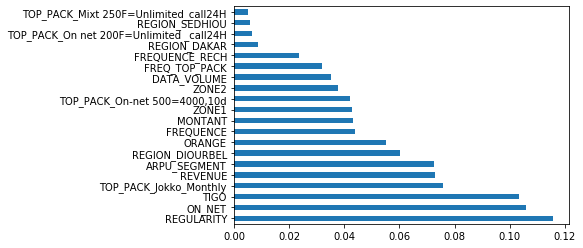

In [198]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

## Trying to predict on the test data

In [208]:
test_set = pd.read_csv('Test.csv')
test_set.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [209]:
test_set = test_set.fillna(-99999)
df2 = test_set

test_set = test_set.drop(['user_id'],axis=1)

In [210]:
X = pd.get_dummies(test_set)
print(X.shape,y.shape)
X.head()

(100000, 130) (2074,)


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,...,TOP_PACK_Twter_U2opia_Daily,TOP_PACK_Twter_U2opia_Monthly,TOP_PACK_Twter_U2opia_Weekly,TOP_PACK_VAS(IVR_Radio_Daily),TOP_PACK_VAS(IVR_Radio_Monthly),TOP_PACK_WIFI_ Family _10MBPS,TOP_PACK_WIFI_ Family _4MBPS,TOP_PACK_WIFI_Family_2MBPS,"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month",TOP_PACK_Yewouleen_PKG
0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0
1,-99999.0,-99999.0,10.0,3.0,1.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0
2,1900.0,15.0,2299.0,766.0,21.0,414.0,-99999.0,7.0,2.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0
3,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0
4,32000.0,47.0,33000.0,11000.0,47.0,-99999.0,128.0,555.0,280.0,-99999.0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
pred = clf.predict(X)

ValueError: Number of features of the model must match the input. Model n_features is 88 and input n_features is 68 

In [ ]:
#df.fillna(0,inplace=True)

In [6]:
# Loading the data dictionary to understand the meaning of the variable relatively to the business
variable_definition = pd.read_csv('VariableDefinitions.csv')
variable_definition

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income
